In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt
from monai.apps.utils import download_url
from monai.transforms import LoadImage
from monai.transforms.utility.dictionary import CoordinateTransformd

axial_path = "./spleen_60_axial.mrk.json"
coronal_path = "./spleen_60_coronal.mrk.json"
sagittal_path = "./spleen_60_sagittal.mrk.json"
# download_url("https://drive.google.com/uc?id=1zv57rnoPi0tP8w14KvX818XgaYuAJ6c3", axial_path)
# download_url("https://drive.google.com/uc?id=1f_xRQ2qGfCeG4GgYjX2NlJpuAmo0NBNi", coronal_path)
# download_url("https://drive.google.com/uc?id=1dQmKLw3IwyaSXwzxUqrNrx4o7vTqd22-", sagittal_path)

with open(axial_path, 'r') as file:
    data_axial = json.load(file)
with open(coronal_path, 'r') as file:
    data_coronal = json.load(file)
with open(sagittal_path, 'r') as file:
    data_sagittal = json.load(file)

coordinates_image_axial = np.array([
    [198, 202, 78],
    [187, 178, 78],
    [157, 156, 78],
    [138, 137, 78],
    [81, 185, 78],
    [75, 264, 78],
    [94, 238, 78],
    [115, 206, 78],
    [150, 204, 78],
    [192, 208, 78],
])

coordinates_image_coronal = np.array([
    [315, 205, 74],
    [305, 205, 70],
    [309, 205, 64],
    [328, 205, 66],
    [323, 205, 62],
    [319, 205, 58],
    [363, 205, 53],
    [385, 205, 59],
    [385, 205, 66],
    [352, 205, 72],
])

coordinates_image_sagittal = np.array([
    [187, 174, 74],
    [187, 166, 68],
    [187, 181, 64],
    [187, 219, 67],
    [187, 215, 72],
    [187, 188, 74],
])

# download the image from: https://drive.google.com/file/d/1HV6bUMDXbzJEyhBRpHVsPD62LUn6W8V1/view?usp=sharing

image_path = "/workspace/Data/Task09_Spleen/imagesTr/spleen_60.nii.gz"
label_path = "/workspace/Data/Task09_Spleen/imagesTr/spleen_60_lbl.nii.gz"
# download_url("https://drive.google.com/file/d/1QVMRHaOOEfgfRqXWOo3z4dodnsq0KmX8/view?usp=sharing", label_path)
image = LoadImage(image_only=True, reader="ITKReader")(image_path)

coordinates_world_axial = np.array([i['position'] for i in data_axial['markups'][0]['controlPoints']])
coordinates_world_coronal = np.array([i['position'] for i in data_coronal['markups'][0]['controlPoints']])
coordinates_world_sagittal = np.array([i['position'] for i in data_sagittal['markups'][0]['controlPoints']])

data = {
    "coordinates_image_axial": coordinates_image_axial[None],
    "coordinates_image_coronal": coordinates_image_coronal[None],
    "coordinates_image_sagittal": coordinates_image_sagittal[None],
    "coordinates_world_axial": coordinates_world_axial[None],
    "coordinates_world_coronal": coordinates_world_coronal[None],
    "coordinates_world_sagittal": coordinates_world_sagittal[None],
    "image": image,
    "label": label_path
}

COORD_IMAGE = ["coordinates_image_axial", "coordinates_image_coronal", "coordinates_image_sagittal"]
COORD_WORLD = ["coordinates_world_axial", "coordinates_world_coronal", "coordinates_world_sagittal"]

2024-08-02 10:30:14,979 - INFO - Expected md5 is None, skip md5 check for file /workspace/Data/Task09_Spleen/imagesTr/spleen_60_lbl.nii.gz.
2024-08-02 10:30:14,979 - INFO - File exists: /workspace/Data/Task09_Spleen/imagesTr/spleen_60_lbl.nii.gz, skipped downloading.


## CoordinateTransformd

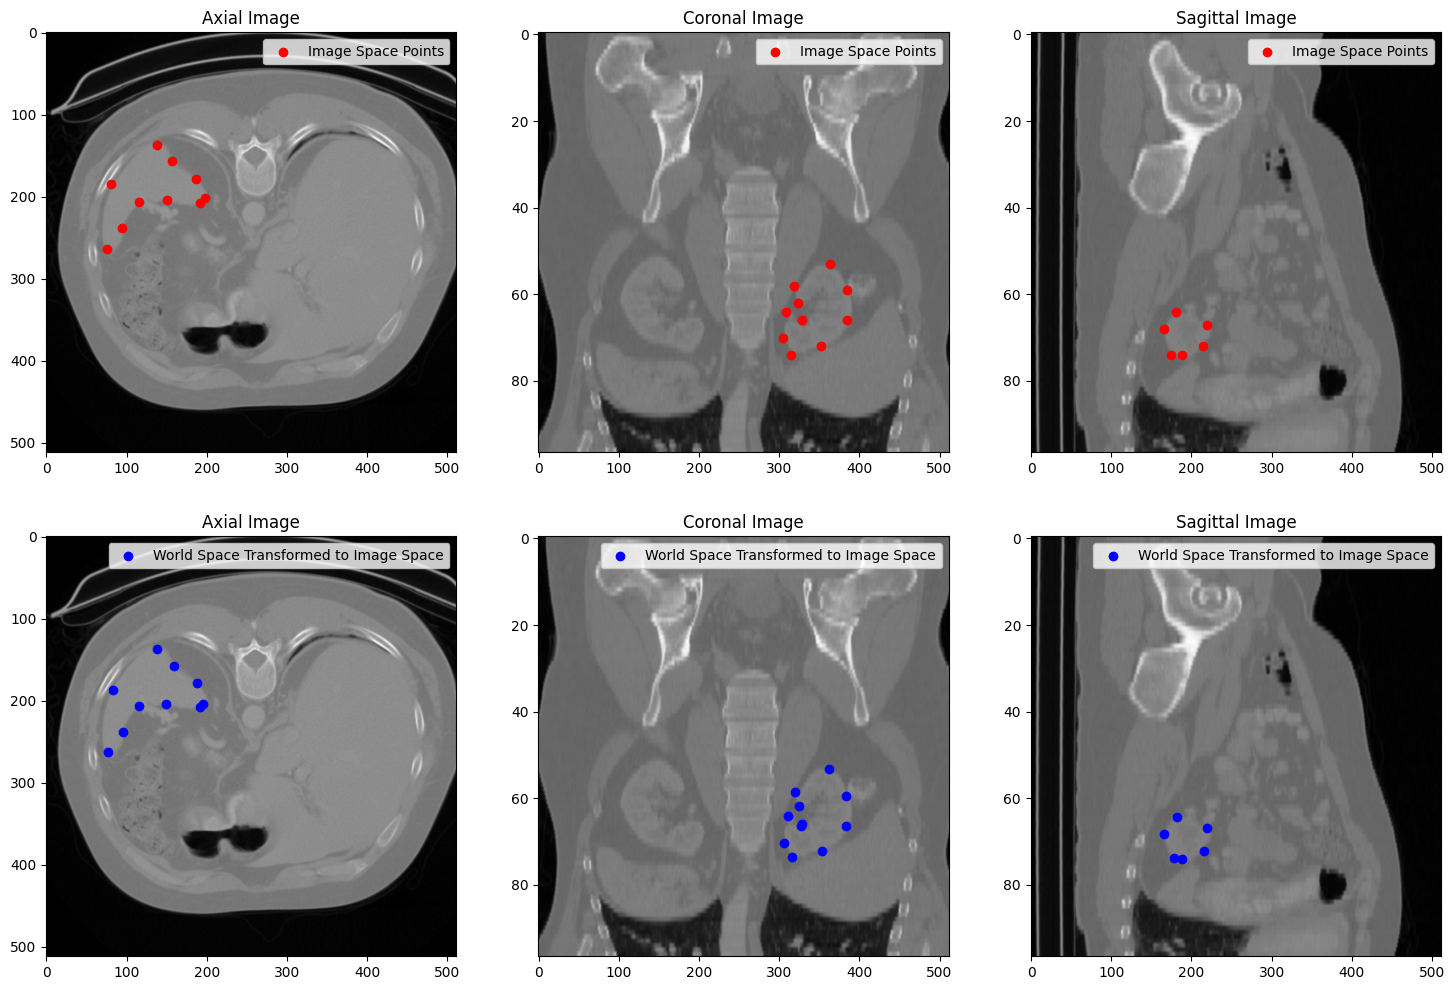

In [6]:
image_to_world_transform = CoordinateTransformd(keys=COORD_IMAGE, refer_key="image", mode='image_to_world')
world_to_image_transform = CoordinateTransformd(keys=COORD_WORLD, refer_key="image", mode='world_to_image', affine_lps_to_ras=True)

world_points_transformed_axial = image_to_world_transform(data)["coordinates_image_axial"]
world_points_transformed_coronal = image_to_world_transform(data)["coordinates_image_coronal"]
world_points_transformed_sagittal = image_to_world_transform(data)["coordinates_image_sagittal"]
out = world_to_image_transform(data)
image_points_transformed_axial = world_to_image_transform(data)["coordinates_world_axial"][0]
image_points_transformed_coronal = world_to_image_transform(data)["coordinates_world_coronal"][0]
image_points_transformed_sagittal = world_to_image_transform(data)["coordinates_world_sagittal"][0]

# visualize the points
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

def plt_ax(ax, image, coordinates, color, title, label):
    ax.imshow(image.T, cmap='gray', aspect='auto')
    ax.scatter(coordinates[0], coordinates[1], c=color, label=label)
    ax.set_title(title)
    ax.legend()


plt_ax(ax[0, 0], image[:, :, 78], (coordinates_image_axial[:, 0], coordinates_image_axial[:, 1]), 'r', 'Axial Image', 'Image Space Points')
plt_ax(ax[0, 1], image[:, 205, :], (coordinates_image_coronal[:, 0], coordinates_image_coronal[:, 2]), 'r', 'Coronal Image', 'Image Space Points')
plt_ax(ax[0, 2], image[187, :, :], (coordinates_image_sagittal[:, 1], coordinates_image_sagittal[:, 2]), 'r', 'Sagittal Image', 'Image Space Points')
plt_ax(ax[1, 0], image[:, :, 78], (image_points_transformed_axial[:, 0], image_points_transformed_axial[:, 1]), 'b', 'Axial Image', 'World Space Transformed to Image Space')
plt_ax(ax[1, 1], image[:, 205, :], (image_points_transformed_coronal[:, 0], image_points_transformed_coronal[:, 2]), 'b', 'Coronal Image', 'World Space Transformed to Image Space')
plt_ax(ax[1, 2], image[187, :, :], (image_points_transformed_sagittal[:, 1], image_points_transformed_sagittal[:, 2]), 'b', 'Sagittal Image', 'World Space Transformed to Image Space')

plt.show()

In [7]:
# invert it back to world space

out = world_to_image_transform.inverse(out)
print( coordinates_world_axial - out["coordinates_world_axial"] )

[[[-2.84217094e-14 -2.84217094e-14  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -5.68434189e-14  0.00000000e+00]
  [-5.68434189e-14 -5.68434189e-14  0.00000000e+00]
  [ 0.00000000e+00 -5.68434189e-14  0.00000000e+00]
  [ 0.00000000e+00 -2.84217094e-14  0.00000000e+00]
  [ 0.00000000e+00 -2.84217094e-14  0.00000000e+00]
  [ 0.00000000e+00 -5.68434189e-14  0.00000000e+00]
  [-5.68434189e-14 -5.68434189e-14  0.00000000e+00]
  [ 0.00000000e+00 -2.84217094e-14  0.00000000e+00]]]


## Add transform chain

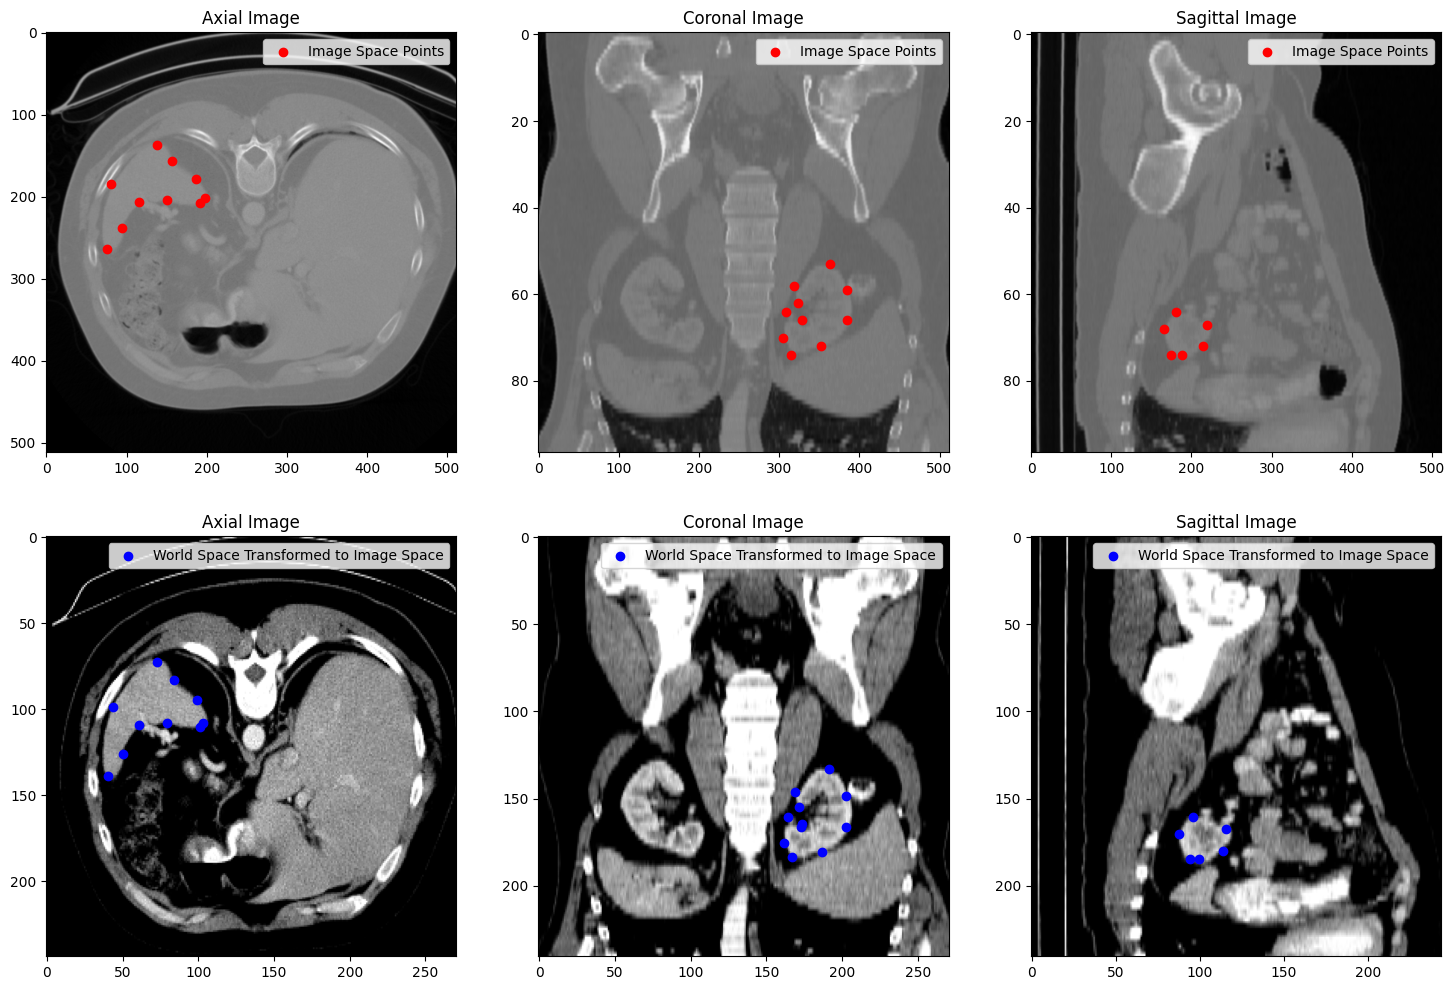

In [26]:
from monai.transforms import LoadImaged, Compose, Flipd, Resized, Rotated, Zoomd, EnsureChannelFirstd, ScaleIntensityRanged, CropForegroundd, Orientationd, Spacingd, RandCropByPosNegLabeld, RandAffined
from monai.transforms.utility.dictionary import CoordinateTransformd
import matplotlib.pyplot as plt

data["image"] = image_path
# world_to_image_transform = Compose([
#     LoadImaged(keys="image", image_only=True, reader="ITKReader", ensure_channel_first=True),
#     Flipd(keys="image", spatial_axis=[0, 1]),
#     CoordinateTransformd(keys=COORD_WORLD, refer_key="image", mode='world_to_image', affine_lps_to_ras=True)
# ])

world_to_image_transform = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),
        ScaleIntensityRanged(
            keys=["image"],
            a_min=-57,
            a_max=164,
            b_min=0.0,
            b_max=1.0,
            clip=True,
        ),
        CropForegroundd(keys=["image", "label"], source_key="image"),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        Spacingd(keys=["image", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "nearest")),
        # RandCropByPosNegLabeld(
        #     keys=["image", "label"],
        #     label_key="label",
        #     spatial_size=(96, 96, 96),
        #     pos=1,
        #     neg=1,
        #     num_samples=4,
        #     image_key="image",
        #     image_threshold=0,
        # ),
        # RandAffined(
        #     keys=['image', 'label'],
        #     mode=('bilinear', 'nearest'),
        #     prob=1.0, spatial_size=(196, 196, 196),
        #     rotate_range=(0, 0, np.pi/15),
        #     scale_range=(0.1, 0.1, 0.1)),
        CoordinateTransformd(keys=COORD_WORLD, refer_key="image", mode='world_to_image', affine_lps_to_ras=True)
    ]
)

image_to_world_transform = Compose([
    LoadImaged(keys="image", image_only=True, reader="ITKReader"),
    CoordinateTransformd(keys=COORD_IMAGE, refer_key="image", mode='image_to_world')
])

world_points_transformed_axial = image_to_world_transform(data)["coordinates_image_axial"]
world_points_transformed_coronal = image_to_world_transform(data)["coordinates_image_coronal"]
world_points_transformed_sagittal = image_to_world_transform(data)["coordinates_image_sagittal"]
out = world_to_image_transform(data)
image_points_transformed_axial = world_to_image_transform(data)["coordinates_world_axial"][0]
image_points_transformed_coronal = world_to_image_transform(data)["coordinates_world_coronal"][0]
image_points_transformed_sagittal = world_to_image_transform(data)["coordinates_world_sagittal"][0]

# visualize the points
fig, ax = plt.subplots(2, 3, figsize=(18, 12))


plt_ax(ax[0, 0], image[:, :, 78], (coordinates_image_axial[:, 0], coordinates_image_axial[:, 1]), 'r', 'Axial Image', 'Image Space Points')
plt_ax(ax[0, 1], image[:, 205, :], (coordinates_image_coronal[:, 0], coordinates_image_coronal[:, 2]), 'r', 'Coronal Image', 'Image Space Points')
plt_ax(ax[0, 2], image[187, :, :], (coordinates_image_sagittal[:, 1], coordinates_image_sagittal[:, 2]), 'r', 'Sagittal Image', 'Image Space Points')
plt_ax(ax[1, 0], out['image'][0][:, :, 195], (image_points_transformed_axial[:, 0], image_points_transformed_axial[:, 1]), 'b', 'Axial Image', 'World Space Transformed to Image Space')
plt_ax(ax[1, 1], out['image'][0][:, 108, :], (image_points_transformed_coronal[:, 0], image_points_transformed_coronal[:, 2]), 'b', 'Coronal Image', 'World Space Transformed to Image Space')
plt_ax(ax[1, 2], out['image'][0][98, :, :], (image_points_transformed_sagittal[:, 1], image_points_transformed_sagittal[:, 2]), 'b', 'Sagittal Image', 'World Space Transformed to Image Space')

plt.show()

In [25]:
image_points_transformed_axial, image_points_transformed_coronal, image_points_transformed_sagittal

(metatensor([[103.1032, 108.0153, 195.0000],
         [ 99.3218,  94.6085, 195.0000],
         [ 83.8524,  83.2642, 195.0000],
         [ 72.8519,  72.2638, 195.0000],
         [ 43.6318,  98.7337, 195.0000],
         [ 40.5380, 138.9542, 195.0000],
         [ 50.5072, 125.8911, 195.0000],
         [ 60.8201, 109.0466, 195.0000],
         [ 79.0397, 108.0153, 195.0000],
         [101.3844, 110.0779, 195.0000]], dtype=torch.float64),
 metatensor([[172.7553, 108.0153, 166.1641],
         [164.5825, 108.0153, 160.4176],
         [161.5178, 108.0153, 175.7415],
         [167.1365, 108.0153, 183.7866],
         [187.0576, 108.0153, 180.7218],
         [202.8923, 108.0153, 166.1641],
         [202.8923, 108.0153, 148.5416],
         [191.1439, 108.0153, 133.2177],
         [169.1797, 108.0153, 146.2430],
         [171.7337, 108.0153, 154.6712],
         [173.7769, 108.0153, 164.6317]], dtype=torch.float64),
 metatensor([[ 98.8740,  99.7034, 184.9571],
         [ 98.8740, 114.0627, 180.2455],

# LUNA pipeline

In [ ]:
import torch
from monai.transforms import (
    Compose,
    DeleteItemsd,
    EnsureChannelFirstd,
    EnsureTyped,
    LoadImaged,
    Orientationd,
    RandAdjustContrastd,
    RandGaussianNoised,
    RandGaussianSmoothd,
    RandRotated,
    RandScaleIntensityd,
    RandShiftIntensityd,
)
from monai.apps.detection.transforms.dictionary import (
    AffineBoxToImageCoordinated,
    AffineBoxToWorldCoordinated,
    BoxToMaskd,
    ClipBoxToImaged,
    ConvertBoxToStandardModed,
    MaskToBoxd,
    RandCropBoxByPosNegLabeld,
    RandFlipBoxd,
    RandRotateBox90d,
    RandZoomBoxd,
    ConvertBoxModed,
    StandardizeEmptyBoxd,
)
import numpy as np
image_key = "image"
label_key = "label"
box_key = "box"
compute_dtype = torch.float32
gt_box_mode = "cccwhd"
affine_lps_to_ras=True
patch_size = (192,192,80)
batch_size = 4
train_transforms = Compose(
    [
        LoadImaged(keys=[image_key], image_only=False, meta_key_postfix="meta_dict"),
        EnsureChannelFirstd(keys=[image_key]),
        EnsureTyped(keys=[image_key, box_key], dtype=torch.float32),
        EnsureTyped(keys=[label_key], dtype=torch.long),
        StandardizeEmptyBoxd(box_keys=[box_key], box_ref_image_keys=image_key),
        Orientationd(keys=[image_key], axcodes="RAS"),
        EnsureTyped(keys=[image_key], dtype=torch.float16),
        ConvertBoxToStandardModed(box_keys=[box_key], mode=gt_box_mode),
        AffineBoxToImageCoordinated(
            box_keys=[box_key],
            box_ref_image_keys=image_key,
            image_meta_key_postfix="meta_dict",
            affine_lps_to_ras=affine_lps_to_ras,
        ),
        RandCropBoxByPosNegLabeld(
            image_keys=[image_key],
            box_keys=box_key,
            label_keys=label_key,
            spatial_size=patch_size,
            whole_box=True,
            num_samples=batch_size,
            pos=1,
            neg=1,
        ),
        RandZoomBoxd(
            image_keys=[image_key],
            box_keys=[box_key],
            box_ref_image_keys=[image_key],
            prob=0.2,
            min_zoom=0.7,
            max_zoom=1.4,
            padding_mode="constant",
            keep_size=True,
        ),
        ClipBoxToImaged(
            box_keys=box_key,
            label_keys=[label_key],
            box_ref_image_keys=image_key,
            remove_empty=True,
        ),
        RandFlipBoxd(
            image_keys=[image_key],
            box_keys=[box_key],
            box_ref_image_keys=[image_key],
            prob=0.5,
            spatial_axis=0,
        ),
        RandFlipBoxd(
            image_keys=[image_key],
            box_keys=[box_key],
            box_ref_image_keys=[image_key],
            prob=0.5,
            spatial_axis=1,
        ),
        RandFlipBoxd(
            image_keys=[image_key],
            box_keys=[box_key],
            box_ref_image_keys=[image_key],
            prob=0.5,
            spatial_axis=2,
        ),
        RandRotateBox90d(
            image_keys=[image_key],
            box_keys=[box_key],
            box_ref_image_keys=[image_key],
            prob=0.75,
            max_k=3,
            spatial_axes=(0, 1),
        ),
        BoxToMaskd(
            box_keys=[box_key],
            label_keys=[label_key],
            box_mask_keys=["box_mask"],
            box_ref_image_keys=image_key,
            min_fg_label=0,
            ellipse_mask=True,
        ),
        RandRotated(
            keys=[image_key, "box_mask"],
            mode=["nearest", "nearest"],
            prob=0.2,
            range_x=np.pi / 6,
            range_y=np.pi / 6,
            range_z=np.pi / 6,
            keep_size=True,
            padding_mode="zeros",
        ),
        MaskToBoxd(
            box_keys=[box_key],
            label_keys=[label_key],
            box_mask_keys=["box_mask"],
            min_fg_label=0,
        ),
        DeleteItemsd(keys=["box_mask"]),
        RandGaussianNoised(keys=[image_key], prob=0.1, mean=0, std=0.1),
        RandGaussianSmoothd(
            keys=[image_key],
            prob=0.1,
            sigma_x=(0.5, 1.0),
            sigma_y=(0.5, 1.0),
            sigma_z=(0.5, 1.0),
        ),
        RandScaleIntensityd(keys=[image_key], prob=0.15, factors=0.25),
        RandShiftIntensityd(keys=[image_key], prob=0.15, offsets=0.1),
        RandAdjustContrastd(keys=[image_key], prob=0.3, gamma=(0.7, 1.5)),
        EnsureTyped(keys=[image_key, box_key], dtype=compute_dtype),
        EnsureTyped(keys=[label_key], dtype=torch.long),
    ]
)


In [2]:
from typing import List, Tuple
import numpy as np

def box_to_points(box):
    """
    Convert a box defined by its center and size into an array of 8 corner points.

    Parameters:
    center_size (Tuple[float, float, float, float, float, float]): 
        A tuple containing (x_center, y_center, z_center, x_size, y_size, z_size)

    Returns:
        np.ndarray: 
            An array of shape (8, 3) containing the coordinates of the 8 corners of the box.
    """
    x_center, y_center, z_center, x_size, y_size, z_size = box
    
    # Calculate half sizes
    half_sizes = np.array([x_size, y_size, z_size]) / 2.0

    # Define the 8 corner offsets
    offsets = np.array([
        [-1, -1, -1],
        [ 1, -1, -1],
        [-1,  1, -1],
        [ 1,  1, -1],
        [-1, -1,  1],
        [ 1, -1,  1],
        [-1,  1,  1],
        [ 1,  1,  1]
    ])

    # Calculate corner points
    points = np.array([x_center, y_center, z_center]) + offsets * half_sizes

    return points[None]

data = {
    "box": [
            [-128.6994211,
            -175.3192718,
            -298.3875064,
            5.651470635,
            5.651470635,
            5.651470635]
    ],
    "image": "/workspace/Data/luna_test_sample/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.nii.gz",
    "label": [
        0,
    ],
}

data['box_points'] = box_to_points(data['box'][0])

In [3]:
def points_to_bbox(points):
    xmin, ymin, zmin = np.min(points, axis=0)
    xmax, ymax, zmax = np.max(points, axis=0)

    return np.array([xmin, ymin, zmin, xmax, ymax, zmax])

In [9]:
print('--------------after luna detection transform-----------------')
out = train_transforms(data)
for j, i in enumerate(out):
    print(f"sample {j}: {out[j]['box']}")
print('--------------after coordinate transform transform-----------------')
np.set_printoptions(precision=3, suppress=True)
from monai.transforms.utility.dictionary import CoordinateTransformd
from monai.transforms import Compose

world_to_image_transform = Compose([CoordinateTransformd(keys=['box_points'], refer_key="image", mode='world_to_image', affine_lps_to_ras=True)])

world_points_transformed = world_to_image_transform(out)

for i, j in enumerate(world_points_transformed):
    print(f"sample {i}: {points_to_bbox(j['box_points'][0])}")

--------------after luna detection transform-----------------
sample 0: tensor([], size=(0, 6))
sample 1: tensor([[51., 37., 74., 59., 45., 79.]])
sample 2: tensor([[152.,  10.,  12., 161.,  18.,  18.]])
sample 3: tensor([], size=(0, 6))
--------------after coordinate transform transform-----------------
sample 0: [375.184 202.466  16.729 383.222 210.503  21.251]
sample 1: [50.497 36.778 74.749 58.534 44.816 79.271]
sample 2: [151.686   8.573   9.569 161.681  18.461  18.048]
sample 3: [ 33.868  75.38  -44.046  43.336  85.435 -37.792]
